In [1]:
import freecurrencyapi
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import time

# Initialize the FreeCurrencyAPI client
api_key = 'fca_live_XpqNkF2yjEAAPpDvkfILZu9aBHT6PdNfPDv8AJVa'  # Your API key
client = freecurrencyapi.Client(api_key)

# Function to fetch historical exchange rate data
def fetch_historical_exchange_rates(client, date, base='GBP', targets=['USD', 'EUR', 'AED', 'CNY']):
    date_str = date.strftime('%Y-%m-%d')
    try:
        data = client.historical(date_str, base_currency=base)
        if 'data' in data and date_str in data['data']:
            return {currency: data['data'][date_str].get(currency, None) for currency in targets}
        else:
            return {currency: None for currency in targets}
    except Exception as e:
        print(f"Failed to fetch exchange rates for {date_str}: {e}")
        return {currency: None for currency in targets}

# Fetch exchange rates for a range of dates and multiple currencies
def fetch_exchange_rates(start_date, end_date, currencies, client):
    dates = pd.date_range(start_date, end_date)
    results = []

    for date in dates:
        rates = fetch_historical_exchange_rates(client, date, base='GBP', targets=currencies)
        for currency, rate in rates.items():
            if rate is not None:
                results.append({'date': date, 'currency': currency, 'rate': rate})
        time.sleep(6)  # Sleep for 6 seconds to respect rate limit (10 requests/minute)

    return pd.DataFrame(results)

# Example usage
start_date = datetime(2025, 1, 1)
end_date = datetime(2025, 1, 15)
currencies = ['USD', 'EUR', 'CNY']  # Specify currencies for US, EU, CN.
#####################The Problem is they don't have ME data!!!!!!!!!!

# Fetch and process exchange rate data
exchange_data = fetch_exchange_rates(start_date, end_date, currencies, client)


NameError: name 'normalise_rates' is not defined

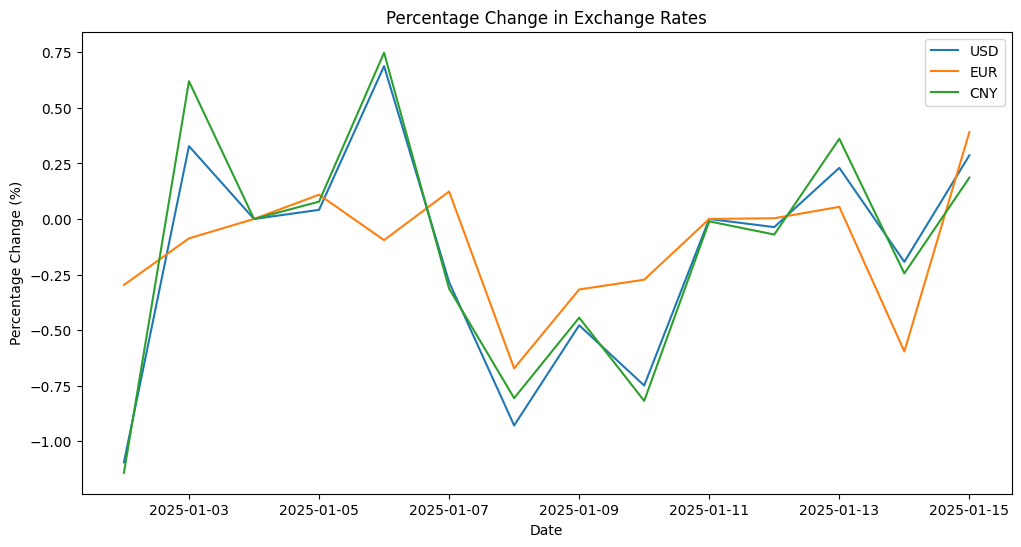

         date currency      rate  percentage_change
0  2025-01-01      USD  1.251784                NaN
1  2025-01-01      EUR  1.209186                NaN
2  2025-01-01      CNY  9.140049                NaN
3  2025-01-02      USD  1.238068          -1.095686
4  2025-01-02      EUR  1.205594          -0.297049
5  2025-01-02      CNY  9.035657          -1.142141
6  2025-01-03      USD  1.242128           0.327914
7  2025-01-03      EUR  1.204541          -0.087301
8  2025-01-03      CNY  9.091681           0.620032
9  2025-01-04      USD  1.242128           0.000007
10 2025-01-04      EUR  1.204541           0.000007
11 2025-01-04      CNY  9.091682           0.000010
12 2025-01-05      USD  1.242637           0.041005
13 2025-01-05      EUR  1.205855           0.109094
14 2025-01-05      CNY  9.098765           0.077906
15 2025-01-06      USD  1.251188           0.688154
16 2025-01-06      EUR  1.204707          -0.095227
17 2025-01-06      CNY  9.166846           0.748249
18 2025-01-0

In [2]:
# Normalise exchange rates relative to the first day
def calculate_percentage_change(df):
    if 'rate' in df.columns:
        df['percentage_change'] = df.groupby('currency')['rate'].pct_change() * 100
    else:
        print("No 'rate' column found in DataFrame.")
    return df

exchange_data = calculate_percentage_change(exchange_data)

# Visualise the data
if not exchange_data.empty:
    plt.figure(figsize=(12, 6))
    for currency in currencies:
        subset = exchange_data[exchange_data['currency'] == currency]
        plt.plot(subset['date'], subset['percentage_change'], label=currency)

    plt.title('Percentage Change in Exchange Rates')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.legend()
    plt.show()
else:
    print("No data to display.")

# Print the processed DataFrame
print(exchange_data)